In [1]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from collections import Counter
#import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [2]:
date = "JUN29"

chainSGN = ROOT.TChain("events")
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_Phi3Cat_2018.root".format(date))
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1041_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)

df = df.Define("scale", "w*lumiIntegrated")\
    .Define("Pion_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, 211, 421, 423, 25)")\
    .Define("Kaon_pt_GEN", "getPt(GenPart_pt, GenPart_pdgId, GenPart_genPartIdxMother, -321, 421, 423, 25)")\
    .Define("Diff_Pion_pt", "(goodMeson_trk1_pt[0] - Pion_pt_GEN)/Pion_pt_GEN")\
    .Define("Diff_Kaon_pt", "(goodMeson_trk2_pt[0] - Kaon_pt_GEN)/Kaon_pt_GEN")\
    .Define("goodMeson_Pion_pt_0", "goodMeson_trk1_pt[0]")\
    .Define("goodMeson_Kaon_pt_0", "goodMeson_trk2_pt[0]")
    
    

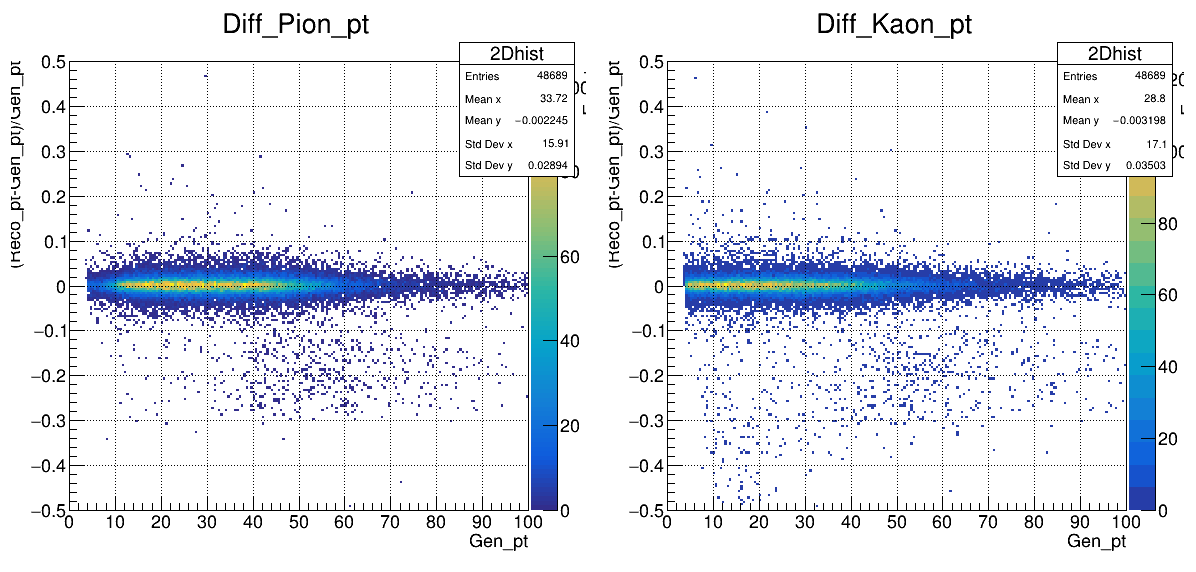

In [3]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, ylow, yhigh = 200, 0, 100, -0.5, 0.5

var, part = "pt", "Pion"

h_pion = df.Histo2D(("2Dhist", "Diff_{}_{}".format(part, var), nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "Diff_{}_{}".format(part, var))
#h = df.Histo2D(("2Dhist", "title", nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "goodMeson_{}_{}_0".format(part, var))

var, part = "pt", "Kaon"
h_kaon = df.Histo2D(("2Dhist", "Diff_{}_{}".format(part, var), nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "Diff_{}_{}".format(part, var))

h_pion.GetXaxis().SetTitle("Gen_{0}".format(var))
h_pion.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h_pion.GetZaxis().SetTitle("Events")
h_kaon.GetXaxis().SetTitle("Gen_{0}".format(var))
h_kaon.GetYaxis().SetTitle("(Reco_{0}-Gen_{0})/Gen_{0}".format(var))
h_kaon.GetZaxis().SetTitle("Events")

h_pion.SetContour(100)
p = canvas.cd(1)
p.SetGrid()
h_pion.Draw("colz")
p = canvas.cd(2)
p.SetGrid()
h_kaon.Draw("colz")

canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


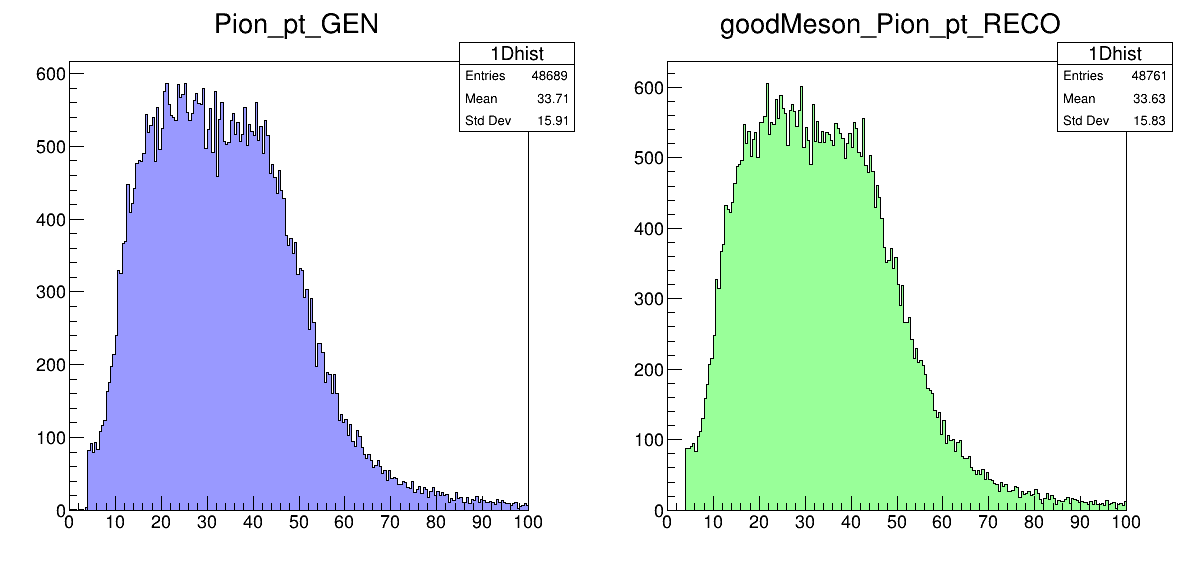

In [4]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, = 200, 0, 100
var, part = "pt", "Pion"

h_pion = df.Histo1D(("1Dhist", "{}_{}_GEN".format(part, var), nbins, xlow, xhigh), "{}_{}_GEN".format(part, var))
hr = df.Histo1D(("1Dhist", "goodMeson_{}_{}_RECO".format(part, var), nbins, xlow, xhigh), "goodMeson_{}_{}_0".format(part, var))
#h = df.Histo2D(("2Dhist", "title", nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "goodMeson_{}_{}_0".format(part, var))

canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)
h_pion.SetFillColor(ROOT.kBlue-9)
hr.SetFillColor(ROOT.kGreen-9)
h_pion.SetLineColor(ROOT.kBlack)
hr.SetLineColor(ROOT.kBlack)
canvas.cd(1)
h_pion.Draw("hist")
canvas.cd(2)
hr.Draw("hist")

canvas.SetGrid()
canvas.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


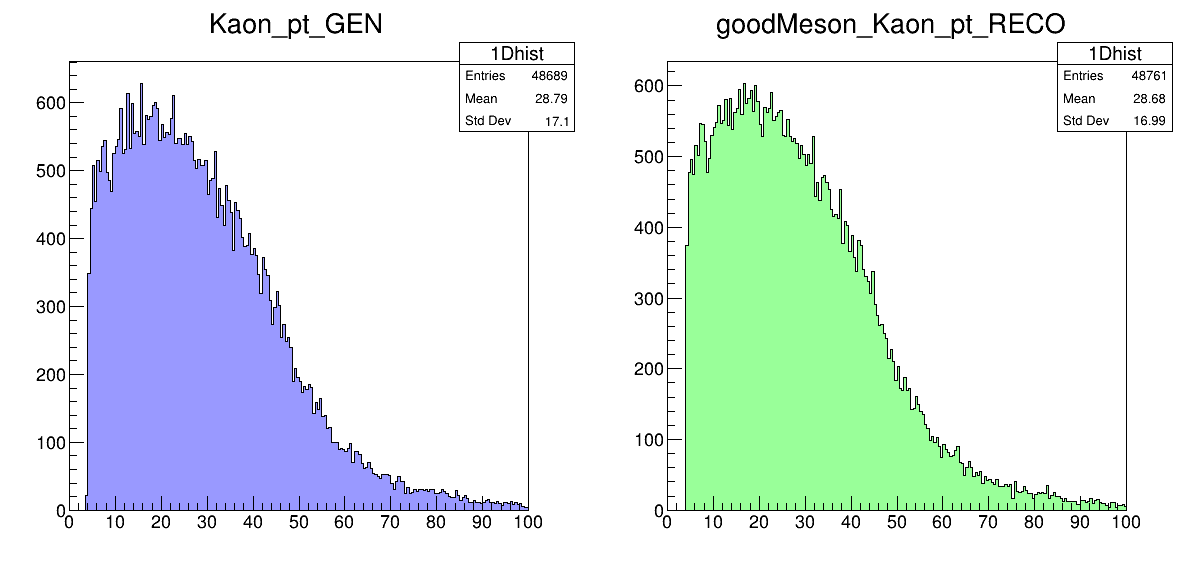

In [5]:
canvas = ROOT.TCanvas("canvas", "canvas", 1200, 600)
canvas.Divide(2, 1)

nbins, xlow, xhigh, = 200, 0, 100
var, part = "pt", "Kaon"

h_pion = df.Histo1D(("1Dhist", "{}_{}_GEN".format(part, var), nbins, xlow, xhigh), "{}_{}_GEN".format(part, var))
hr = df.Histo1D(("1Dhist", "goodMeson_{}_{}_RECO".format(part, var), nbins, xlow, xhigh), "goodMeson_{}_{}_0".format(part, var))
#h = df.Histo2D(("2Dhist", "title", nbins, xlow, xhigh, nbins, ylow, yhigh), "{}_{}_GEN".format(part, var), "goodMeson_{}_{}_0".format(part, var))

canvas.SetRightMargin(0.15)
canvas.SetLeftMargin(0.13)
h_pion.SetFillColor(ROOT.kBlue-9)
hr.SetFillColor(ROOT.kGreen-9)
h_pion.SetLineColor(ROOT.kBlack)
hr.SetLineColor(ROOT.kBlack)
canvas.cd(1)
h_pion.Draw("hist")
canvas.cd(2)
hr.Draw("hist")

canvas.SetGrid()
canvas.Draw()